In [1]:
comment='Calculated in Plot_ExpVis_Word2vec.ipynb'

# Visualizations of HON Lattice 2D based on Word2vec
These plots are in a separate notebook, because reproducing the output of Word2vec requires overriding the hash function. Which was not done initially.

In [2]:
%matplotlib inline
#%matplotlib notebook
import numpy as np
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from HigherOrderPathGenerator import CrossValidation_HigherOrderPathGenerator
from Embedding import HON_DeepWalk_Embedding, HONEM_Embedding, HON_NetMF_Embedding, HON_GraRep_Embedding, HON_Transition_Hierarchical_Embedding
from SyntheticNetworks import create_lattice_2nd_order_dynamic

In [4]:
size = 10
omega = 0.5
latgen = create_lattice_2nd_order_dynamic(size, omega, lattice_sep='-', check=True)
latgen_FON = create_lattice_2nd_order_dynamic(size, omega=0, lattice_sep='-', check=True)
latgen_FON._id += ' (FON)'

[]
[]
[]
[]


In [5]:
if not os.path.exists('tmp'):
    os.makedirs('tmp')

## DeepWalk(1)
Figure 3.2 (right)

In [6]:
emb_D1 = HON_DeepWalk_Embedding(latgen, 16)
%time emb_D1.train(window_size=1, walk_length=1, random_seed=1, num_walks=5000, num_iter=50, hs=False, negative=1, replace_hash=True)
print('effective dimension', emb_D1.dimension) # unchanged

Wall time: 29.2 s
effective dimension 16


paths: Lattice2D(10, omega=0.500000)
embedding: DeepWalk
dim: (100, 5)
embedding columns: ['x', 'y']
other columns: ['parity', 'x_orig', 'y_orig']

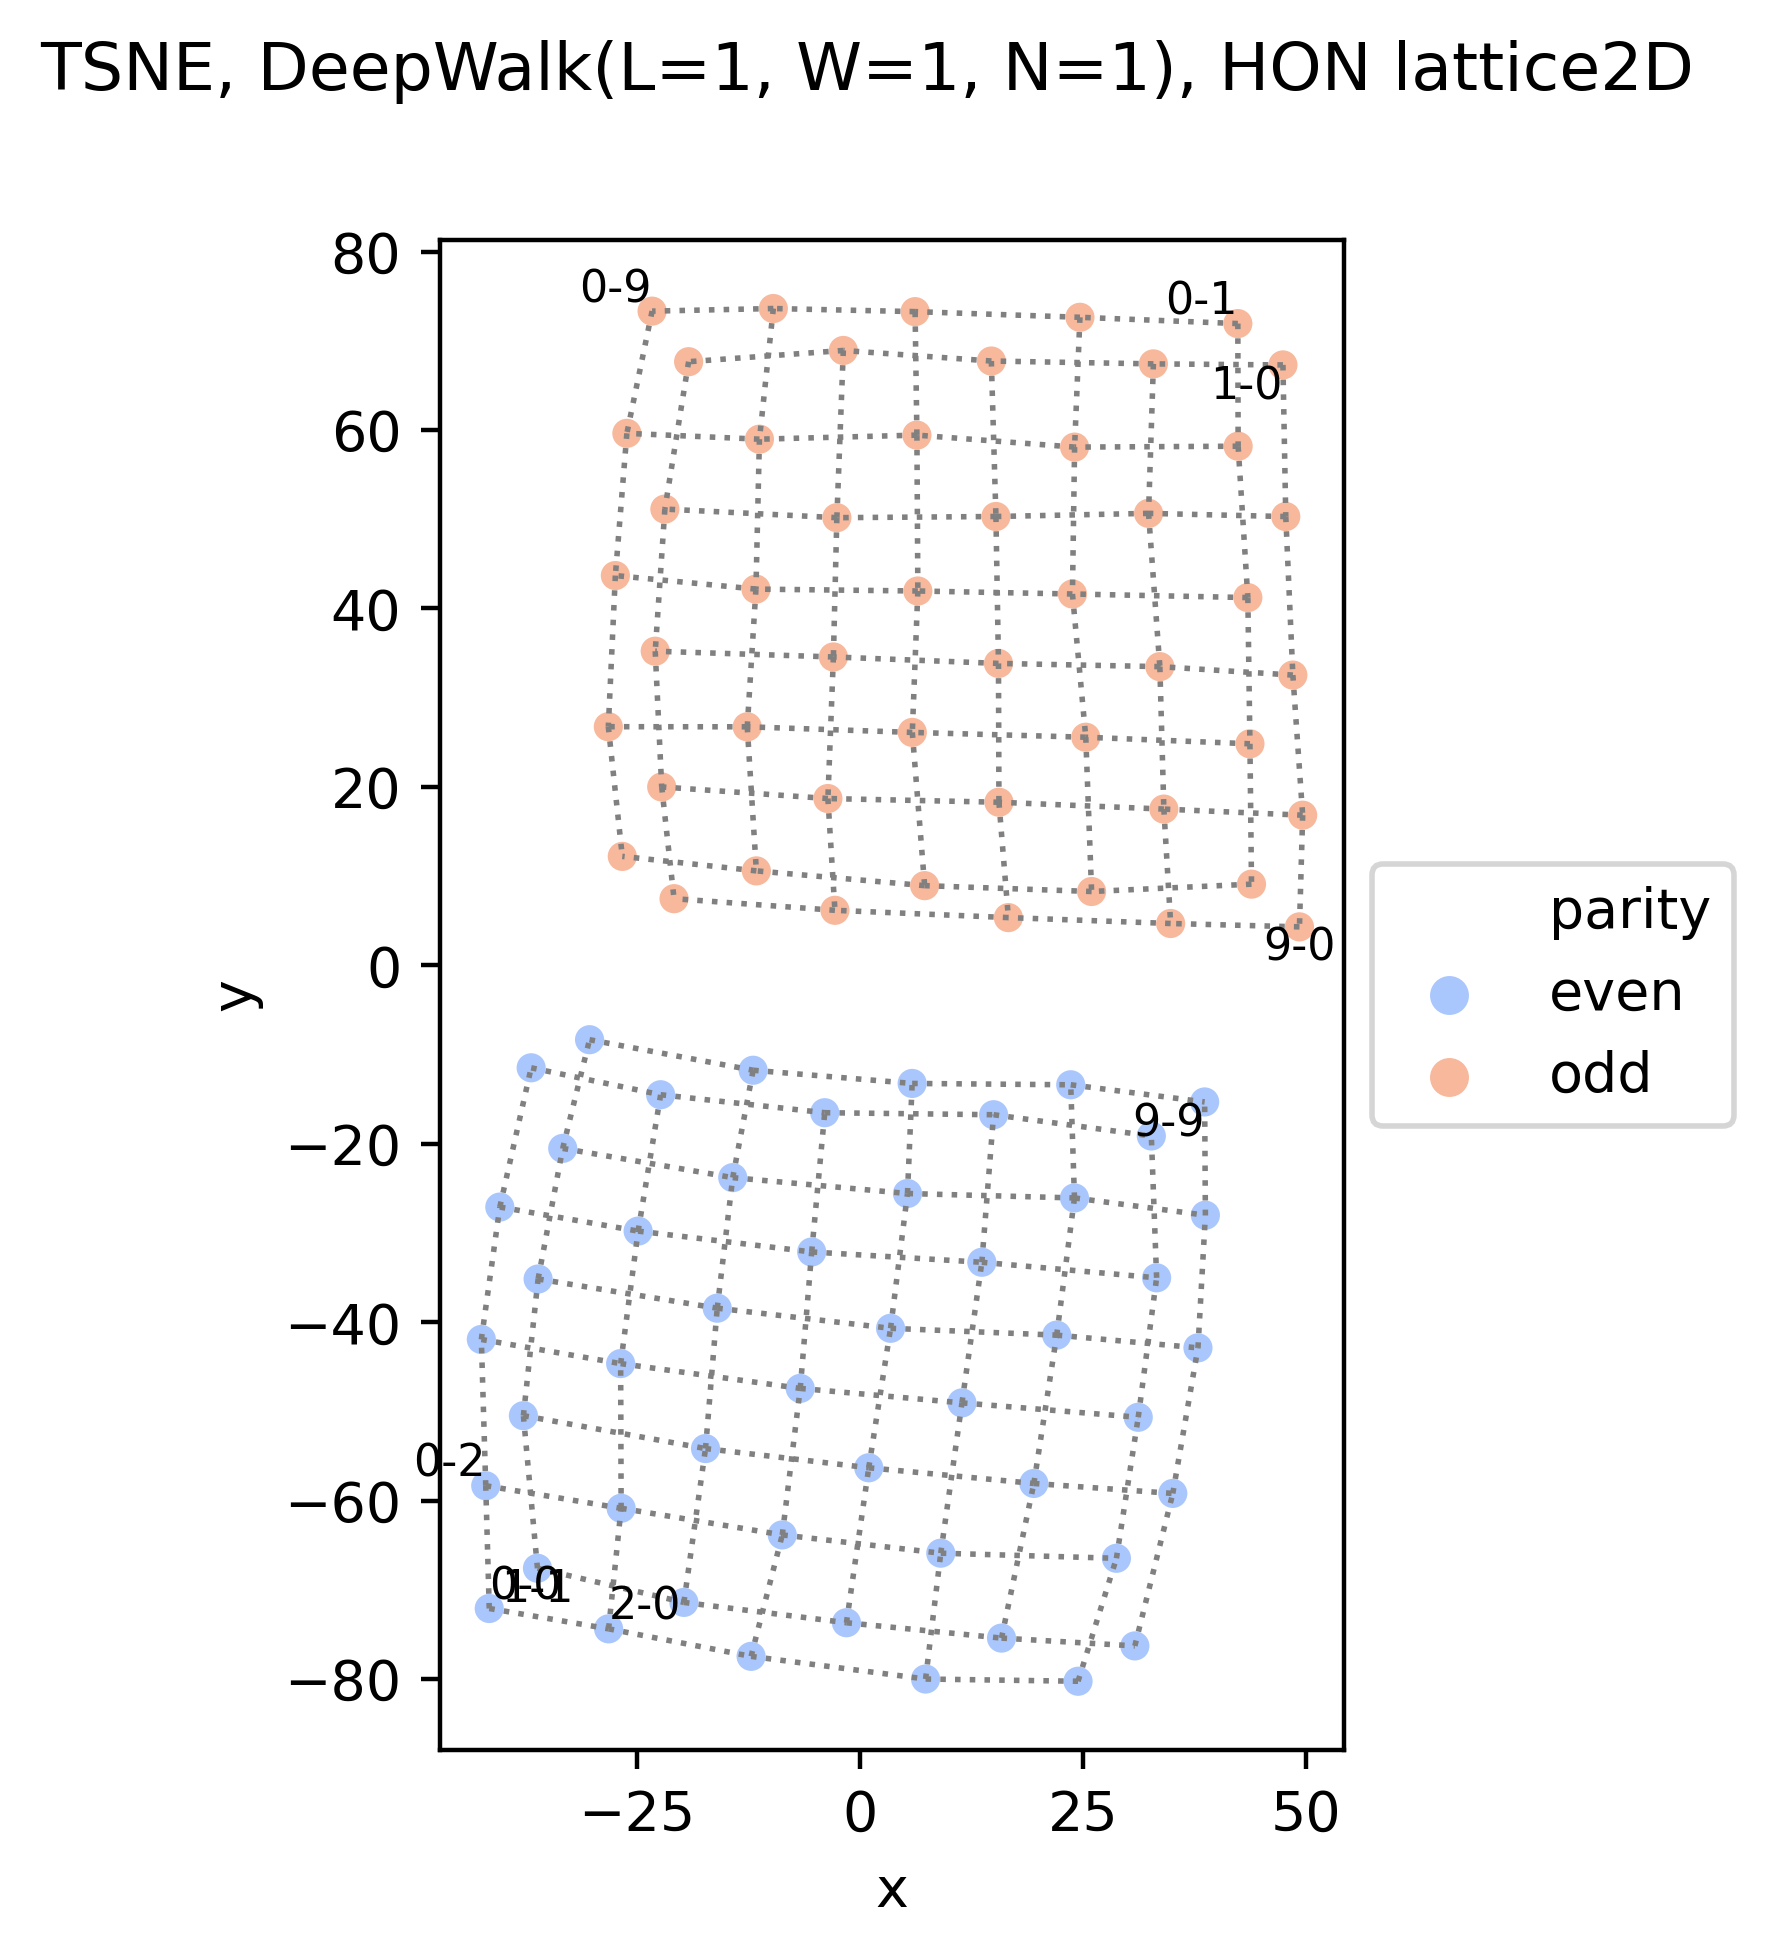

In [7]:
emb_D1.source.edge_distance=2
ev_D1 = emb_D1.source
vis_D1 = ev_D1.visualize_TSNE(random_state=4, n_iter=3000, perplexity=19, learning_rate=300, title='TSNE, DeepWalk(L=1, W=1, N=1), HON lattice2D')
vis_D1.plot1(figsize=(5,5), dpi=400, hue='parity')
vis_D1.annotate_node('0-0', ha='left', va='bottom')
vis_D1.annotate_node('1-1', ha='center', va='top')
vis_D1.annotate_node('0-2', ha='right', va='bottom')
vis_D1.annotate_node('2-0', ha='left', va='bottom')
vis_D1.annotate_node('9-9', ha='right', va='top')
vis_D1.annotate_node('0-1', ha='right', va='bottom')
vis_D1.annotate_node('1-0', ha='right', va='top')
vis_D1.annotate_node('0-9', ha='right', va='bottom')
vis_D1.annotate_node('9-0', ha='center', va='top')
#vis_D1.save_describe('tmp/tsne_deepwalk-one_synth_parity.png', comment)
vis_D1

In [8]:
# find a random state
if False:
    ev = ev_D1
    for x in range(20):
        vis = ev.visualize_TSNE(random_state=x, n_iter=2000, perplexity=19, learning_rate=300)
        vis.plot1(figsize=(4,4), dpi=400, hue='parity')

## DeepWalk(2)
Figure 4.2 (bottom)

In [9]:
# best DeepWalk embedding with window_size=2, see Lattice2D_sim.ipynb
# dimension=16, factor=2, negative=2 - using 5000 instead of 500 walks
emb_D2 = HON_DeepWalk_Embedding(latgen, 16)
%time emb_D2.train(window_size=2, walk_length=4, random_seed=1, num_walks=500*10, num_iter=5, hs=False, negative=2)
print('effective dimension', emb_D2.dimension) # unchanged

Wall time: 6.88 s
effective dimension 16


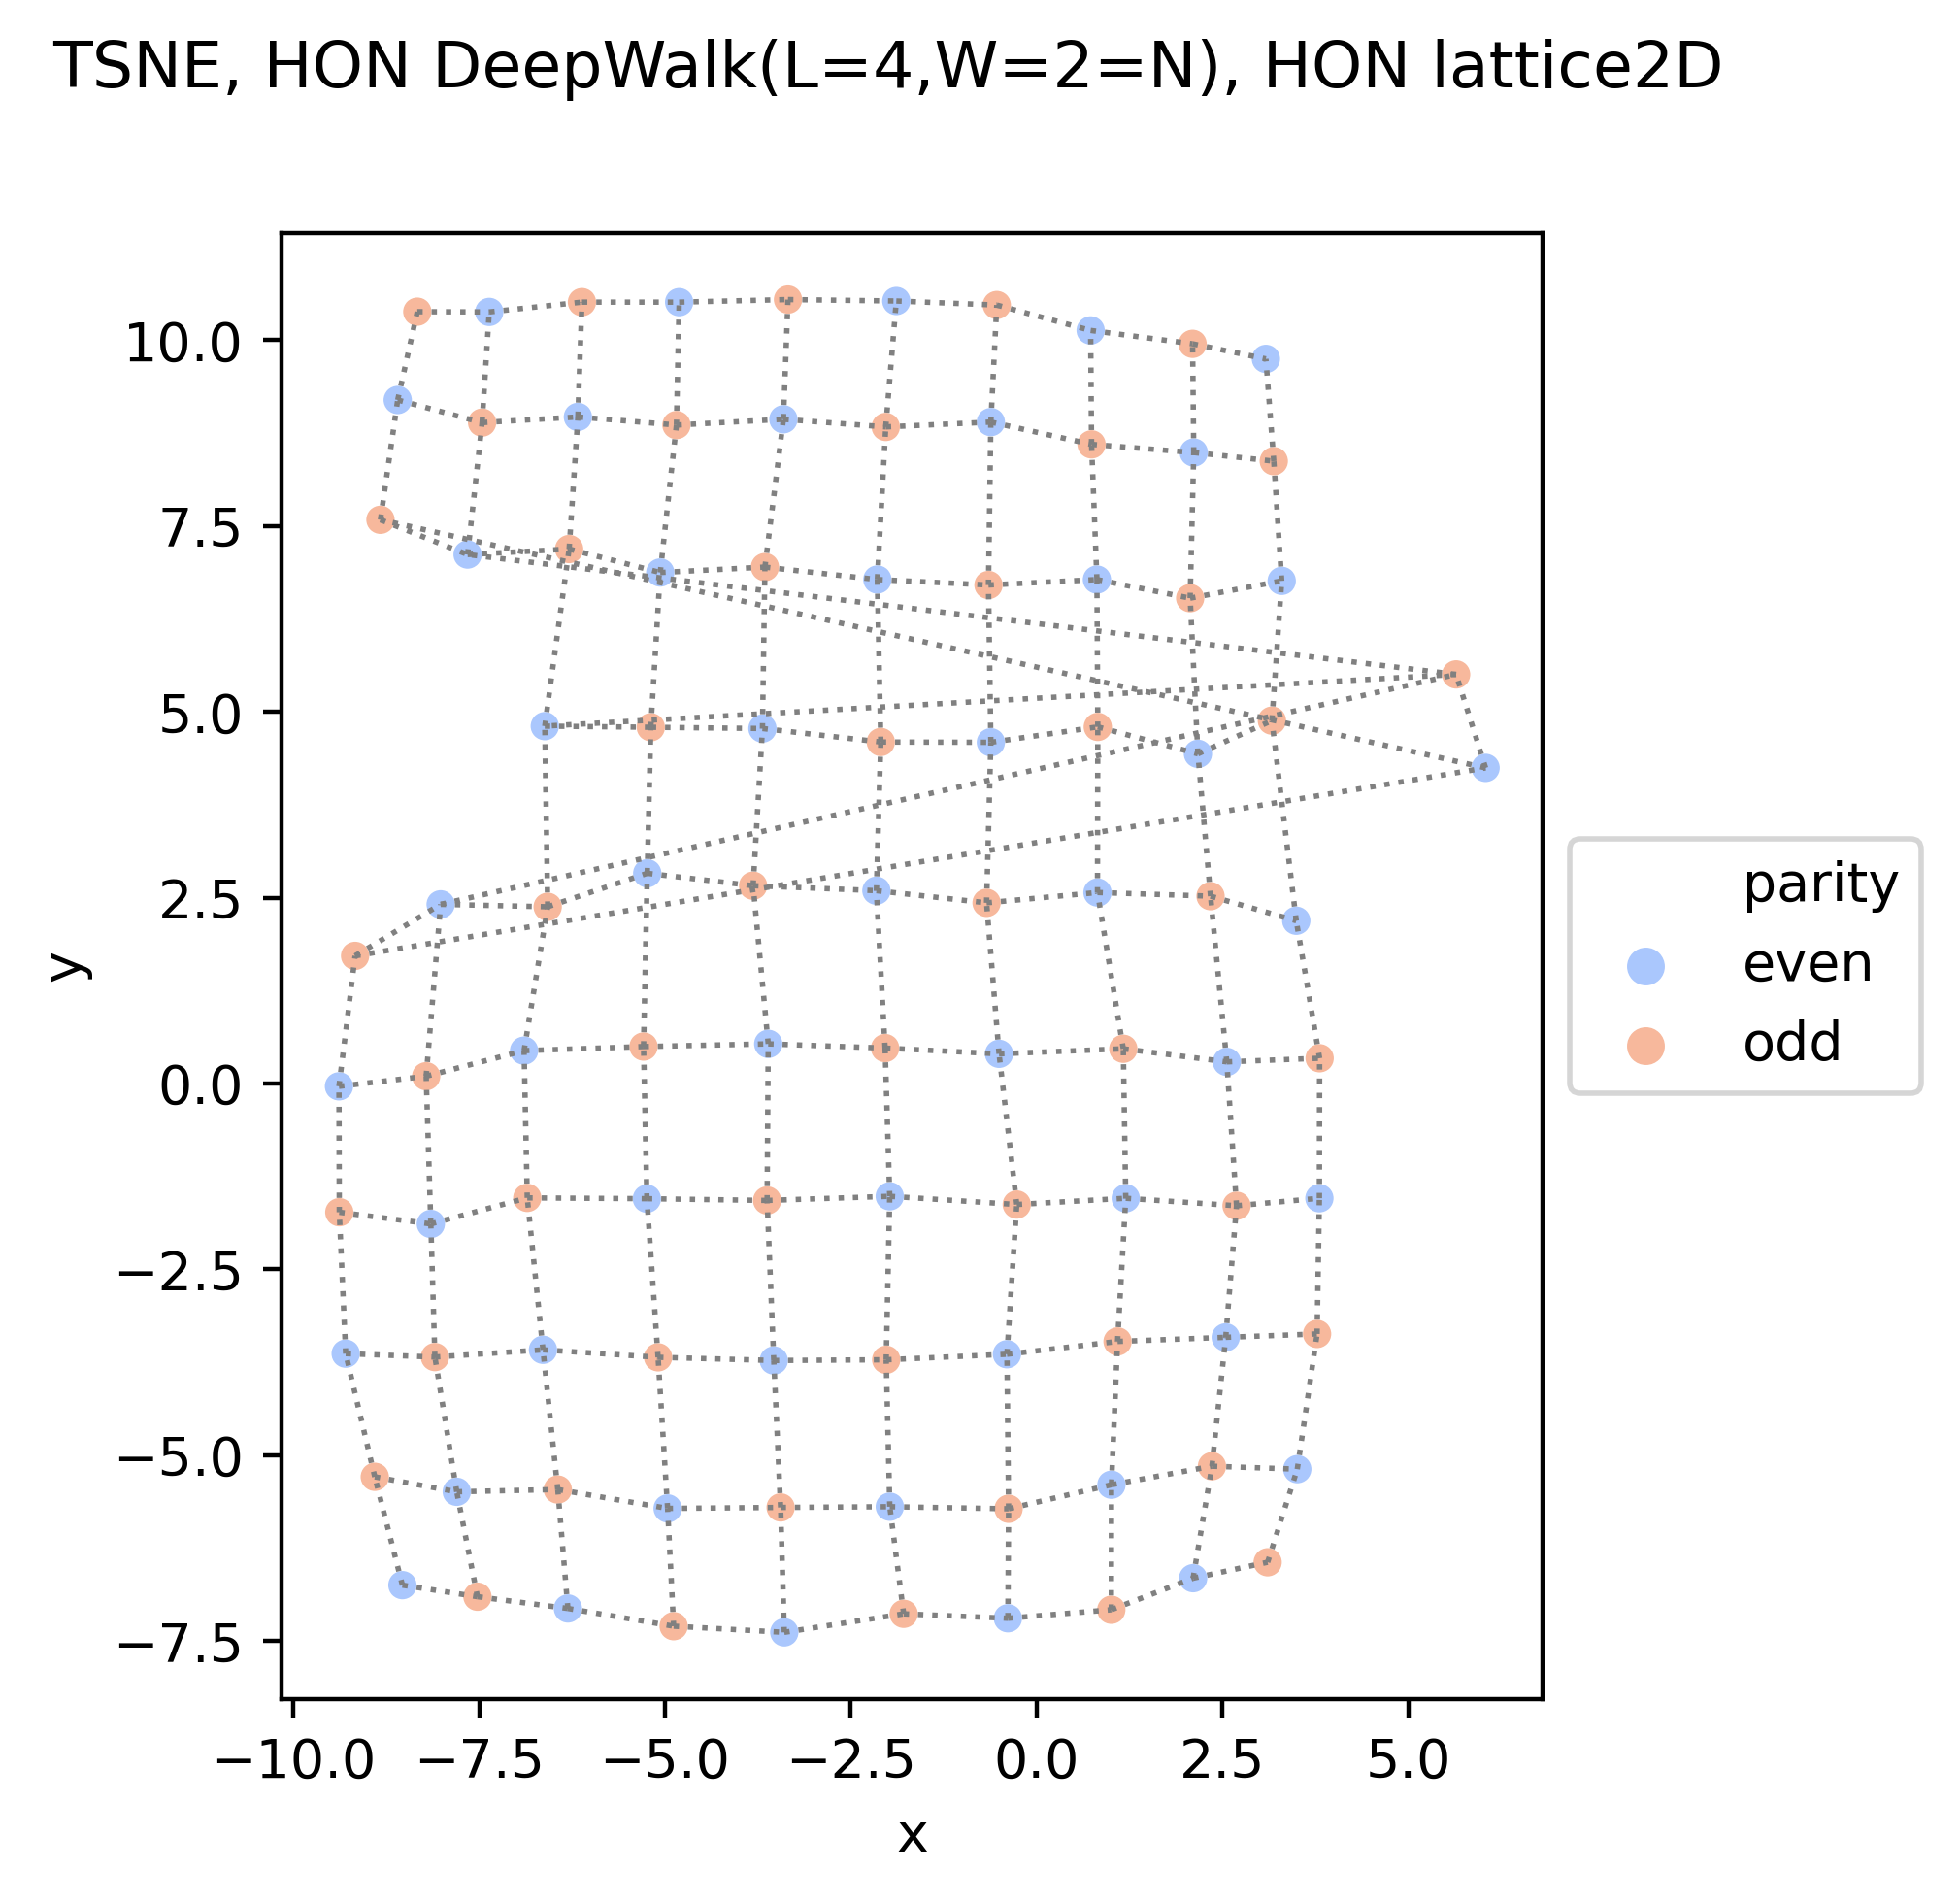

In [10]:
vis_D2 = emb_D2.source.visualize_TSNE(random_state=5, n_iter=1500, title='TSNE, HON DeepWalk(L=4,W=2=N), HON lattice2D')
vis_D2.plot1(figsize=(5,5), dpi=400, hue='parity')
#vis_D2.save_describe('tmp/tsne_deepwalk-w2n2_synth_parity.png', comment)

In [11]:
emb_D2_FON = HON_DeepWalk_Embedding(latgen_FON, 16)
%time emb_D2_FON.train(window_size=2, walk_length=4, random_seed=1, num_walks=500*10, num_iter=5, hs=False, negative=2)
print('effective dimension', emb_D2_FON.dimension) # unchanged

Wall time: 6.65 s
effective dimension 16


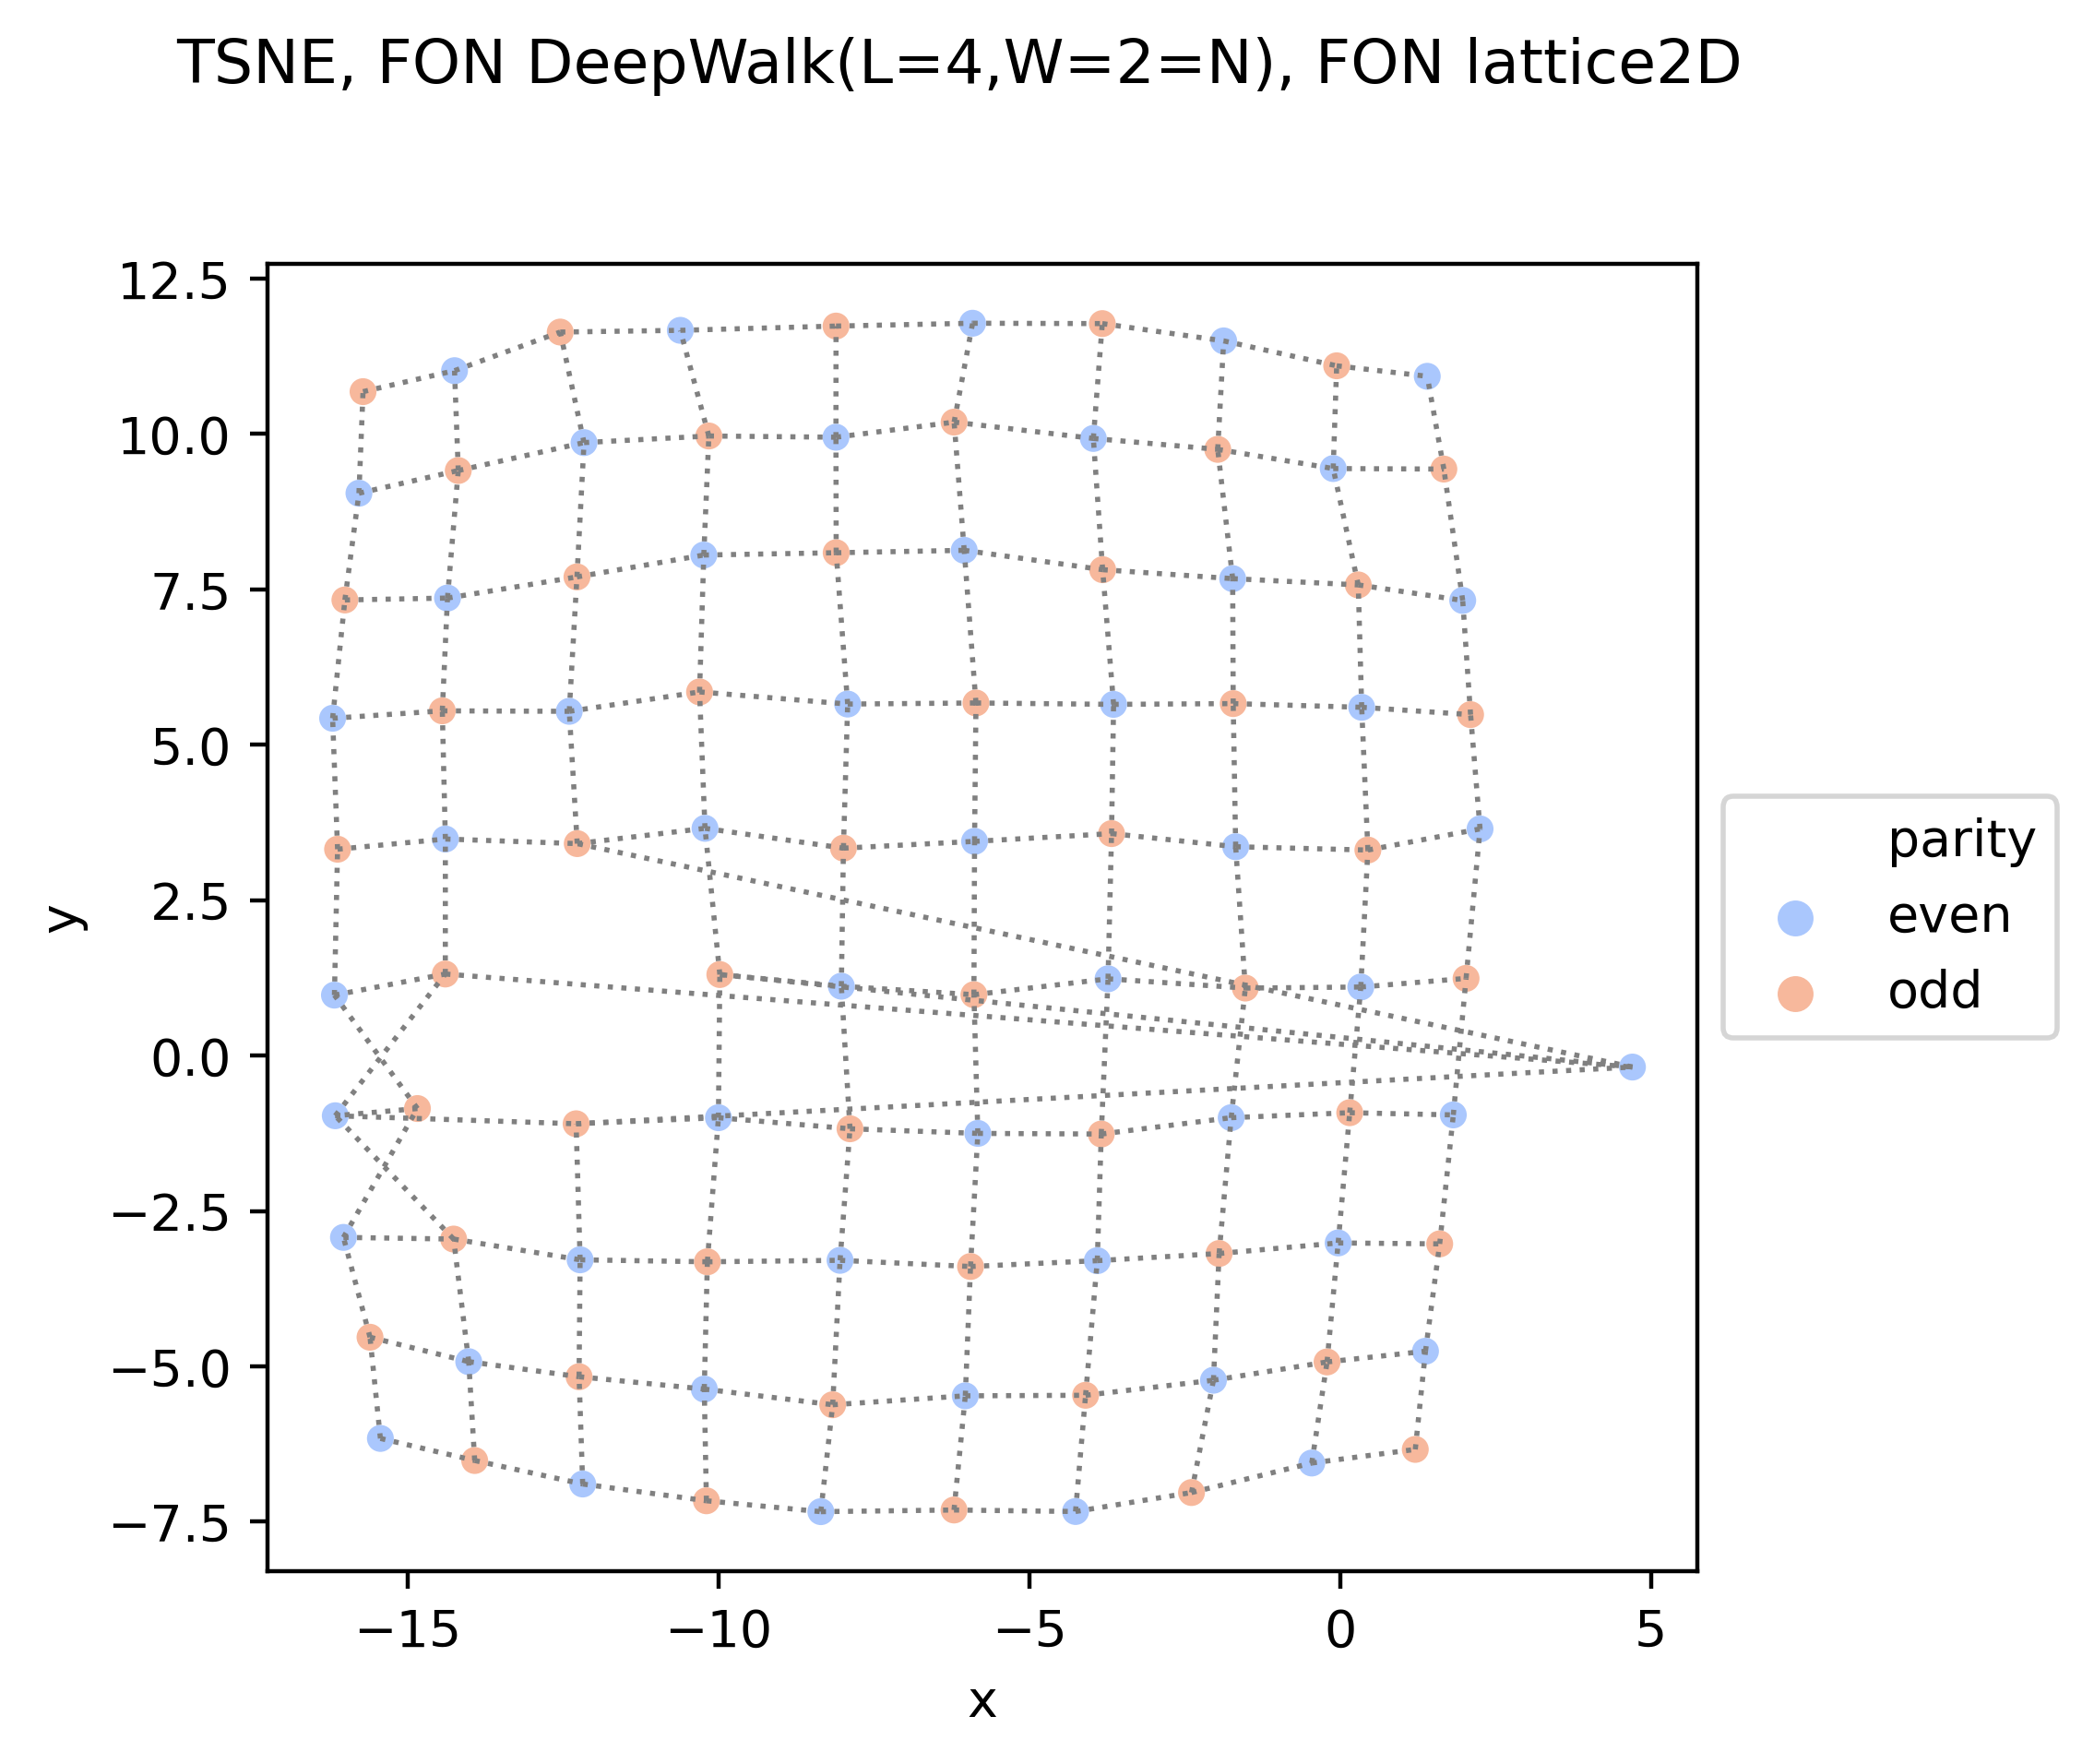

In [12]:
vis_D2_FON = emb_D2_FON.source.visualize_TSNE(random_state=5, n_iter=2000, title='TSNE, FON DeepWalk(L=4,W=2=N), FON lattice2D')
vis_D2_FON.plot1(figsize=(5,5), dpi=400, hue='parity')
#vis_D2_FON.save_describe('tmp/fon_tsne_deepwalk-w2n2_synth_parity.png', comment)

In [13]:
# find a random state
if False:
    ev = emb_D2_FON.source
    for x in range(20):
        vis = ev.visualize_TSNE(random_state=x, n_iter=2000)
        vis.plot1(figsize=(5,5), dpi=400, hue='parity')